# Proyecto individual nro 1: Recomendacion de peliculas

In [2]:
#Importacion de librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing

import json

In [3]:
#Leemos el archivo csv como df
df=pd.read_csv('movies_dataset.csv') 
df.head() 

C:\Users\agusv\AppData\Local\Temp\ipykernel_16560\1592521808.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Entendiendo los datos
df.shape

(45466, 24)

### 1) Transformaciones

#### a) Columnas anidadas

In [5]:
import ast
import re

# Definimos una expresión regular para extraer el nombre de la colección de la columna "belongs_to_collection"
pattern = r"'name': '([^']*)'"

# Extraemos el nombre de la colección utilizando la expresión regular
df['collection_name'] = df['belongs_to_collection'].str.extract(pattern, flags=re.IGNORECASE)

#El resultado se almacena en una nueva columna = "collection_name"

# Imprimimos el DataFrame con la columna normalizada
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection


In [6]:
df.collection_name.nunique()

1644

In [7]:
df[["belongs_to_collection",'collection_name']]

,belongs_to_collection,collection_name
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",Toy Story Collection
1,NaN,NaN
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",Grumpy Old Men Collection
3,NaN,NaN
4,"{'id': 96871, 'name': 'Father of the Bride Col...",Father of the Bride Collection
...,...,...
45461,NaN,NaN
45462,NaN,NaN
45463,NaN,NaN
45464,NaN,NaN


In [8]:
# Creamos una nueva columna para los registros duplicados
df['collection_individual'] = df['collection_name'].str.split(', ') #se crea dividiendo los valores de la columna "collection_name"

# Duplicamos los registros con el medotp explode()
df = df.explode('collection_individual').reset_index(drop=True)

# Eliminar la columna original "collection_name"
df.drop('collection_name', axis=1, inplace=True)

In [9]:
df.collection_individual.unique()

array(['Toy Story Collection', nan, 'Grumpy Old Men Collection', ...,
       'Ducobu Collection', 'Mister Blot Collection',
       'Red Lotus Collection'], dtype=object)

In [10]:
df.collection_individual.nunique()

1667

In [11]:
# Convertimos la cadena JSON en una lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)

# Función personalizada para extraer los nombres de los géneros
def extract_genre_names(genres_list):
    genre_names = [genre['name'] for genre in genres_list]
    return ', '.join(genre_names)

# Aplicamos la función personalizada a cada elemento de la columna "genres"
df['genre'] = df['genres'].apply(extract_genre_names)

# Imprimimos el DataFrame con la columna de géneros normalizados
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_individual,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,"Animation, Comedy, Family"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,"Adventure, Fantasy, Family"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,"Romance, Comedy"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,"Comedy, Drama, Romance"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,Comedy


In [12]:
df.genre.unique()

array(['Animation, Comedy, Family', 'Adventure, Fantasy, Family',
       'Romance, Comedy', ..., 'Crime, Comedy, Action, Family',
       'Action, Mystery, Thriller, Horror',
       'Family, Animation, Romance, Comedy'], dtype=object)

In [13]:
df.genre.nunique()

4069

In [14]:
# Crear una nueva columna para los registros duplicados
df['genre_individual'] = df['genre'].str.split(', ')

# Duplicar los registros
df = df.explode('genre_individual').reset_index(drop=True)

# Eliminar la columna original "genre"
df.drop('genre', axis=1, inplace=True)

In [15]:
df.genre_individual.unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', '', 'Music',
       'Documentary', 'Western', 'TV Movie', 'Carousel Productions',
       'Vision View Entertainment', 'Telescene Film Group Productions',
       'Aniplex', 'GoHands', 'BROSTA TV',
       'Mardock Scramble Production Committee', 'Sentai Filmworks',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel'],
      dtype=object)

In [16]:
print("Cantidad de generos:",df.genre_individual.nunique())

Cantidad de generos: 33


In [17]:
# Función personalizada para normalizar la columna "production_companies"
def normalize_production_companies(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return ', '.join(matches)
    except (TypeError, AttributeError):
        return ''

# Aplicamos la función personalizada a cada elemento de la columna "production_companies"
df['company'] = df['production_companies'].apply(normalize_production_companies)

# Imprimimos el DataFrame con la columna de compañías de producción normalizada
df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_individual,genre_individual,company
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Comedy,Pixar Animation Studios
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Family,Pixar Animation Studios
3,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,"TriStar Pictures, Teitler Film, Interscope Com..."
4,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Fantasy,"TriStar Pictures, Teitler Film, Interscope Com..."


In [18]:
df.company.unique()

array(['Pixar Animation Studios',
       'TriStar Pictures, Teitler Film, Interscope Communications',
       'Warner Bros., Lancaster Gate', ...,
       'Westdeutscher Rundfunk (WDR), Working Title Films, 20th Century Fox Television, CanWest Global Communications',
       'Sine Olivia', 'Yermoliev'], dtype=object)

In [19]:
df.company.nunique()

22580

In [20]:
# Creamos una nueva columna para los registros duplicados
df['company_individual'] = df['company'].str.split(', ')

# Duplicamos los registros
df = df.explode('company_individual').reset_index(drop=True)

# Eliminamos la columna original "company"
df.drop('company', axis=1, inplace=True)

In [21]:
df.company_individual.unique()

array(['Pixar Animation Studios', 'TriStar Pictures', 'Teitler Film', ...,
       'Pirie Productions', 'Sine Olivia', 'Yermoliev'], dtype=object)

In [22]:
print("Cantidad de compañias:",df.company_individual.nunique())

Cantidad de compañias: 23350


In [23]:
# Función personalizada para normalizar la columna "production_countries"
def normalize_production_countries(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return ', '.join(matches)
    except (TypeError, AttributeError):
        return ''

# Aplicamos la función personalizada a cada elemento de la columna "production_countries"
df['country'] = df['production_countries'].apply(normalize_production_countries)

# Imprimimos el DataFrame con la columna de países de producción normalizada
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,collection_individual,genre_individual,company_individual,country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Family,Pixar Animation Studios,United States of America
3,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,TriStar Pictures,United States of America
4,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,Teitler Film,United States of America


In [24]:
df.country.unique()

array(['United States of America', 'Germany, United States of America',
       'United Kingdom, United States of America', ...,
       'Poland, Czech Republic, Slovakia', 'Cuba, Germany, Spain',
       'Egypt, Italy, United States of America'], dtype=object)

In [25]:
df.country.nunique()

2387

In [26]:
# Creamos una nueva columna para los registros duplicados
df['country_individual'] = df['country'].str.split(', ')

# Duplicamos los registros
df = df.explode('country_individual').reset_index(drop=True)

# Eliminamos la columna original "country"
df.drop('country', axis=1, inplace=True)

In [27]:
df.country_individual.unique()

array(['United States of America', 'Germany', 'United Kingdom', 'France',
       'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada',
       '', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands',
       'Hong Kong', 'Tunisia', 'Ireland', 'Dominican Republic', 'Croatia',
       'Russia', 'Macedonia', 'Austria', 'Taiwan', 'New Zealand',
       'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark',
       'Portugal', 'Finland', 'Sweden', 'Argentina', 'Iceland',
       'South Korea', 'Serbia', 'Hungary', 'Czech Republic', 'India',
       'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania',
       'Philippines', 'Vietnam', 'Trinidad and Tobago', 'Bulgaria',
       'Chile', 'Norway', 'Kazakhstan', 'Algeria', 'Luxembourg',
       'Georgia', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey',
       'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina',
       'Bahamas', 'Malaysia', 'Bhutan', 'Jamaica', 'Pakistan', 'Nepal',
       'Thailand', 'Nam

In [28]:
print("Cantidad de paises:",df.country_individual.nunique())

Cantidad de paises: 159


In [29]:
# Función personalizada para normalizar la columna "spoken_languages"
def normalize_spoken_languages(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return ', '.join(matches)
    except (TypeError, AttributeError):
        return ''

# Aplicamos la función personalizada a cada elemento de la columna "spoken_languages"
df['spoken_language'] = df['spoken_languages'].apply(normalize_spoken_languages)

# Imprimimos el DataFrame con la columna de lenguajes normalizada
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,collection_individual,genre_individual,company_individual,country_individual,spoken_language
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America,English
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Family,Pixar Animation Studios,United States of America,English
3,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,TriStar Pictures,United States of America,"English, Français"
4,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,Teitler Film,United States of America,"English, Français"


In [30]:
df.spoken_language.unique()

array(['English', 'English, Français', 'English, Español', ...,
       'svenska, Deutsch', 'العربية, Polski', 'Fulfulde, English'],
      dtype=object)

In [31]:
df.spoken_language.nunique()

1842

In [32]:
# Creamos una nueva columna para los registros duplicados
df['language_individual'] = df['spoken_language'].str.split(', ')

# Duplicamos los registros
df = df.explode('language_individual').reset_index(drop=True)

# Eliminamos la columna original "spoken_language"
df.drop('spoken_language', axis=1, inplace=True)

In [33]:
df.language_individual.unique()

array(['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin',
       'Nederlands', '广州话 / 廣州話', '普通话', 'Magyar', '', 'shqip',
       'Italiano', '한국어/조선말', 'فارسی', 'Dansk', '日本語', 'العربية',
       'Hrvatski', 'Bosanski', 'Română', 'Bahasa indonesia',
       'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski',
       'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português',
       'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'Srpski', 'বাংলা',
       'Wolof', 'Cymraeg', 'ภาษาไทย', 'Latviešu', 'Kiswahili',
       'български език', 'ελληνικά', 'Türkçe', 'suomi', 'Esperanto',
       'Український', 'ქართული', 'Bokmål', 'No Language', 'euskera',
       'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'پښتو',
       'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego',
       'Kinyarwanda', 'қазақ', 'Eesti', 'Lietuvi\\x9akai', 'Slovenščina',
       'తెలుగు', 'Fulfulde', '??????', '?????', 'ozbek', 'Hausa'],
      dtype=object)

In [34]:
print("Cantidad de lenguajes:",df.language_individual.nunique())

Cantidad de lenguajes: 75


In [35]:
df.drop(columns=['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages'], inplace = True)
df.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,video,vote_average,vote_count,collection_individual,genre_individual,company_individual,country_individual,language_individual
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English
1,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America,English
2,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,Family,Pixar Animation Studios,United States of America,English
3,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,TriStar Pictures,United States of America,English
4,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,NaN,Adventure,TriStar Pictures,United States of America,Français


In [36]:
df.shape

(419666, 24)

In [37]:
df.columns

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'collection_individual',
       'genre_individual', 'company_individual', 'country_individual',
       'language_individual'],
      dtype='object')

In [38]:
# Renombramos los nombres de las columnas
df.rename(columns={ 'collection_individual': 'collection', 
                    'genre_individual': 'genre',
                    'company_individual': 'company',
                    'country_individual': 'country',
                    'language_individual': 'language'
}, inplace=True)
df.columns

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'collection', 'genre', 'company',
       'country', 'language'],
      dtype='object')

#### b) Valores nulos

In [39]:
# Los valores nulos de los campos revenue, budget son rellenados por el número 0

df['revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)
print('Nulos en revenue',df.revenue.isna().sum())
print('Nulos en budget',df.revenue.isna().sum())

Nulos en revenue 0
Nulos en budget 0


#### c) Manejo de fechas

In [40]:
# De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de 
# estreno.
# Le damos el formato de fecha a todos los valores de la columna y los que no, le asignamos la etiqueta de nulo
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Se asegura que todos los registros tengan el mismo formato de fecha AAAA-MM-DD
df['release_date'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m-%d')

# se identifican la cantidad de datos nulos de la columna 'release_date' 
df['release_date'].isnull().sum()
# eliminamos los registros con nulos 
df = df.dropna(subset = ['release_date'])

# controlamos para verificar que no existan nulos
df['release_date'].isnull().sum()
# creamos una nueva columna 'release_year' que va a contener unicamnete el dato de año de la columna 'release_date' 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year']=df['release_date'].dt.year

# hacemos control sobre los cambios
df[['release_date','release_year']].tail(10)

,release_date,release_year
419654,1991-05-13,1991
419655,1991-05-13,1991
419656,1991-05-13,1991
419657,1991-05-13,1991
419660,2011-11-17,2011
419661,2003-08-01,2003
419662,2003-08-01,2003
419663,2003-08-01,2003
419664,1917-10-21,1917
419665,2017-06-09,2017


In [41]:
"""df = df.dropna(subset = ['release_date'])
# Transformamos el formato de fecha de 'release_date' a 'aaaa-mm-dd' si el formato es incorrecto
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Completamos los valores nulos o ceros en 'release_date' con 'sin dato'
df['release_date'].dropna(inplace=True)

# Creamos la columna 'release_year' extrayendo el año de 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
#df['release_year'].fillna(np.nan, inplace=True)
df['release_year'] = df['release_year'].astype('Int64')"""

"df = df.dropna(subset = ['release_date'])\n# Transformamos el formato de fecha de 'release_date' a 'aaaa-mm-dd' si el formato es incorrecto\ndf['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')\n\n# Completamos los valores nulos o ceros en 'release_date' con 'sin dato'\ndf['release_date'].dropna(inplace=True)\n\n# Creamos la columna 'release_year' extrayendo el año de 'release_date'\ndf['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year\n#df['release_year'].fillna(np.nan, inplace=True)\ndf['release_year'] = df['release_year'].astype('Int64')"

In [42]:
print(df['release_date'].isnull().sum())

0


In [43]:
# Comparamos las columnas
df[['release_date','release_year']]

,release_date,release_year
0,1995-10-30,1995
1,1995-10-30,1995
2,1995-10-30,1995
3,1995-12-15,1995
4,1995-12-15,1995
...,...,...
419661,2003-08-01,2003
419662,2003-08-01,2003
419663,2003-08-01,2003
419664,1917-10-21,1917


In [44]:
# Buscarmos filas con el valor "sin dato" en la columna 'release_date'
problem_rows = df[df['release_date'] == 'sin dato']

# Mostramos las filas problemáticas
print(problem_rows)

Empty DataFrame
Columns: [adult, budget, homepage, id, imdb_id, original_language, original_title, overview, popularity, poster_path, release_date, revenue, runtime, status, tagline, title, video, vote_average, vote_count, collection, genre, company, country, language, release_year]
Index: []

[0 rows x 25 columns]


In [45]:
# Eliminar filas con el valor "sin dato" en la columna 'release_date'
df = df[df['release_date'] != 'sin dato']
df['release_date'] = pd.to_datetime(df['release_date'])

#### d) Creamos columna de retorno = revenue / budget

In [46]:
# Creamos la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, 
# cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

# Calculamos el retorno de inversión

# Convertimos 'revenue' y 'budget' al tipo numérico (float)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Calculamos el retorno de inversión
df['return'] = df['revenue'] / df['budget']
df['return'].fillna(0, inplace=True)
df['return']

0         12.451801
1         12.451801
2         12.451801
3          4.043035
4          4.043035
            ...    
419661     0.000000
419662     0.000000
419663     0.000000
419664     0.000000
419665     0.000000
Name: return, Length: 419475, dtype: float64

In [47]:
df['return'].isna().sum()

0

In [48]:
df[['revenue','budget','return']]

,revenue,budget,return
0,373554033.0,30000000,12.451801
1,373554033.0,30000000,12.451801
2,373554033.0,30000000,12.451801
3,262797249.0,65000000,4.043035
4,262797249.0,65000000,4.043035
...,...,...,...
419661,0.0,0,0.000000
419662,0.0,0,0.000000
419663,0.0,0,0.000000
419664,0.0,0,0.000000


#### e) Eliminación de columnas innecesarias

Columnas a eliminar: video,imdb_id,adult,original_title,vote_count,poster_path y homepage.

In [49]:
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'collection', 'genre', 'company', 'country', 'language',
       'release_year', 'return'],
      dtype='object')

In [89]:
df.head(2)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,collection,genre,company,country,language,release_year,return_col
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English,1995,12.451801
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America,English,1995,12.451801


In [51]:
print("Filas y columnas:",df.shape)
df.info()

Filas y columnas: (419475, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 419475 entries, 0 to 419665
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   budget             419475 non-null  int64         
 1   id                 419475 non-null  object        
 2   original_language  419379 non-null  object        
 3   overview           416987 non-null  object        
 4   popularity         419475 non-null  object        
 5   release_date       419475 non-null  datetime64[ns]
 6   revenue            419475 non-null  float64       
 7   runtime            418931 non-null  float64       
 8   status             419332 non-null  object        
 9   tagline            227707 non-null  object        
 10  title              419475 non-null  object        
 11  vote_average       419475 non-null  float64       
 12  collection         53658 non-null   object        
 13  genre        

In [52]:
#df.to_csv('nombre_del_archivo_modificado.csv', index=False)

### 2) Funciones

funcion peliculas_mes(mes)

In [53]:
def peliculas_mes(mes):
    '''Se ingresa el mes y la funcion retorna la cantidad de peliculas que se estrenaron ese mes 
    (nombre del mes, en str, ejemplo 'enero') historicamente
    ''' 
    mes = mes.lower()
    meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12}

    mes_numero = meses[mes]

    # Convertir la columna "fecha" a un objeto de tipo fecha
    df['release_date'] = pd.to_datetime(df['release_date'])

    # Tratamos la excepciòn
    try:
        month_filtered = df[df['release_date'].dt.month == mes_numero]
    except (ValueError, KeyError, TypeError):
        return None

    # Filtramos valores duplicados del dataframe y calculamos
    month_unique = month_filtered.drop_duplicates(subset='id')
    respuesta = month_unique.shape[0]

    return {'mes':mes, 'cantidad de peliculas':respuesta}

resultado = peliculas_mes('febrero')  # Encuentra la cantidad de peliculas estrenadas en un mes historicamente
print(resultado)


{'mes': 'febrero', 'cantidad de peliculas': 3028}


funcion peliculas_dia(dia)

In [82]:
def peliculas_dia(dia:str):
    '''Se ingresa el dia y la funcion retorna la cantidad de peliculas que se 
    estrenaron ese dia (de la semana, en str, ejemplo 'lunes') historicamente
    '''
    # Creamos diccionario para normalizar
    days = {
    'lunes': 'Monday',
    'martes': 'Tuesday',
    'miercoles': 'Wednesday',
    'jueves': 'Thursday',
    'viernes': 'Friday',
    'sabado': 'Saturday',
    'domingo': 'Sunday'}

    day = days[dia.lower()]

    # Filtramos los duplicados del dataframe y calculamos
    lista_peliculas_day = df[df['release_date'].dt.day_name() == day].drop_duplicates(subset='id')
    respuesta = lista_peliculas_day.shape[0]

    return {'dia': dia, 'cantidad de peliculas': respuesta}
resultado = peliculas_dia('miercoles')  # Encuentra la cantidad de peliculas estrenadas en un dia historicamente
print(resultado)

{'dia': 'miercoles', 'cantidad de peliculas': 7027}


funcion franquicia(franquicia)

In [84]:
def franquicia(franquicia):
    # Convertimos la entrada del usuario a minúsculas
    franquicia = franquicia.lower()

    # Filtramos el DataFrame para quedarnos solo con las peliculas que pertenecen a la franquicia ingresada
    # Convertimos los datos de la columna a minúsculas antes de hacer la comparación
    peliculas_franquicia = df[df['collection'].str.lower() == franquicia].drop_duplicates(subset='id')

    # Calculamos la cantidad de peliculas de la franquicia
    cantidad = len(peliculas_franquicia)

    # Calculamos la ganancia total sumando 'revenue'
    ganancia_total = peliculas_franquicia['revenue'].sum()

    # Calculamos el promedio total dividiendo la ganancia total por la cantidad de películas
    ganancia_promedio = ganancia_total / cantidad if cantidad > 0 else 0

    return {'franquicia': franquicia, 'cantidad de peliculas': cantidad, 'ganancia total': ganancia_total, 'ganancia promedio': ganancia_promedio}
resultado = franquicia('toy story collection')  
print(resultado)
franquicia("Stuart littLe collection")

{'franquicia': 'toy story collection', 'cantidad de peliculas': 3, 'ganancia total': 1937890605.0, 'ganancia promedio': 645963535.0}


funcion peliculas_pais

In [56]:
def peliculas_pais(pais:str):
    '''
    Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo
    '''
    
    # Filtramos el dataframe y contamos filas
    movies_filtered = df[(df['country'].str.lower() == pais.lower())]
    movies_unique = movies_filtered.drop_duplicates(subset='id')    
    respuesta = movies_unique.shape[0]
    
    return {'pais':pais, 'cantidad de peliculas':respuesta}
peliculas_pais("italy")

{'pais': 'italy', 'cantidad de peliculas': 2165}

funcion productoras

In [102]:
def productoras(productora:str):
    '''Ingresas la productora, retornando la ganancia total y la cantidad de peliculas que produjeron
    ''' 
    # Convertimos la entrada del usuario a minúsculas
    productora = productora.lower()

    # Filtramos el dataframe
    # Convertimos los datos de la columna a minúsculas antes de hacer la comparación
    lista_peliculas_productoras = df[df['company'].str.lower() == productora].drop_duplicates(subset='id')

    # Calculamos
    cantidad_peliculas_prod = (lista_peliculas_productoras).shape[0]
    revenue_prod = lista_peliculas_productoras['revenue'].sum()

    return {'productora': productora, 'ganancia_total': revenue_prod, 'cantidad': cantidad_peliculas_prod}
productoras('TriStar PictureS')

{'productora': 'tristar pictures',
 'ganancia_total': 8022366764.0,
 'cantidad': 197}

In [58]:
df.head(2)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,collection,genre,company,country,language,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English,1995,12.451801
1,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,Toy Story Collection,Comedy,Pixar Animation Studios,United States of America,English,1995,12.451801


funcion retorno

In [116]:
def retorno(pelicula):
    info_pelicula = df[(df['title'] == pelicula)].drop_duplicates(subset='title')
    pelicula_nombre = info_pelicula['title'].iloc[0]
    inversion_pelicula = str(info_pelicula['budget'].iloc[0])
    ganancia_pelicula = str(info_pelicula['revenue'].iloc[0])
    retorno_pelicula = str(info_pelicula['return'].iloc[0])
    year_pelicula = str(info_pelicula['release_year'].iloc[0])

    return {'pelicula':pelicula_nombre, 'inversion':inversion_pelicula, 'ganacia':ganancia_pelicula,'retorno':retorno_pelicula, 'año':year_pelicula}
retorno("Jumanji")

funcion recomendacion

In [60]:
def recomendacion(titulo):
    return 


### 3) Exportamos csv

In [61]:
df.to_csv('movies_ok.csv', index=False)

In [62]:
df.shape

(419475, 19)

In [63]:
null_counts = df.isnull().sum(axis=0)

In [64]:
null_counts

budget                    0
id                        0
original_language        96
overview               2488
popularity                0
release_date              0
revenue                   0
runtime                 544
status                  143
tagline              191768
title                     0
vote_average              0
collection           365817
genre                     0
company                   0
country                   0
language                  0
release_year              0
return                    0
dtype: int64

### 4) EDA

In [65]:
df.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,collection,genre,company,country,language,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,Toy Story Collection,Animation,Pixar Animation Studios,United States of America,English,1995,12.451801


In [77]:
#Identificamos columnas numéricas para detectar posibles outliers

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print('Columnas numéricas:\n', list(numeric_data.columns))

Columnas numéricas:
 ['budget', 'revenue', 'runtime', 'vote_average', 'release_year', 'return']


In [80]:
# Resumen estadístico de las columnas numéricas
df.describe()

,budget,revenue,runtime,vote_average,release_year,return_col
count,4.194750e+05,4.194750e+05,418931.000000,419475.000000,419475.000000,4.194750e+05
mean,1.420070e+07,3.323965e+07,108.760130,5.914299,1999.411412,inf
std,3.196687e+07,1.094072e+08,31.767305,1.458597,17.084213,NaN
min,0.000000e+00,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,93.000000,5.300000,1995.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,105.000000,6.200000,2004.000000,0.000000e+00
75%,1.200000e+07,7.385434e+06,122.000000,6.900000,2010.000000,1.070143e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,2020.000000,inf


In [118]:
df = df.rename(columns={'return_col': 'return'})

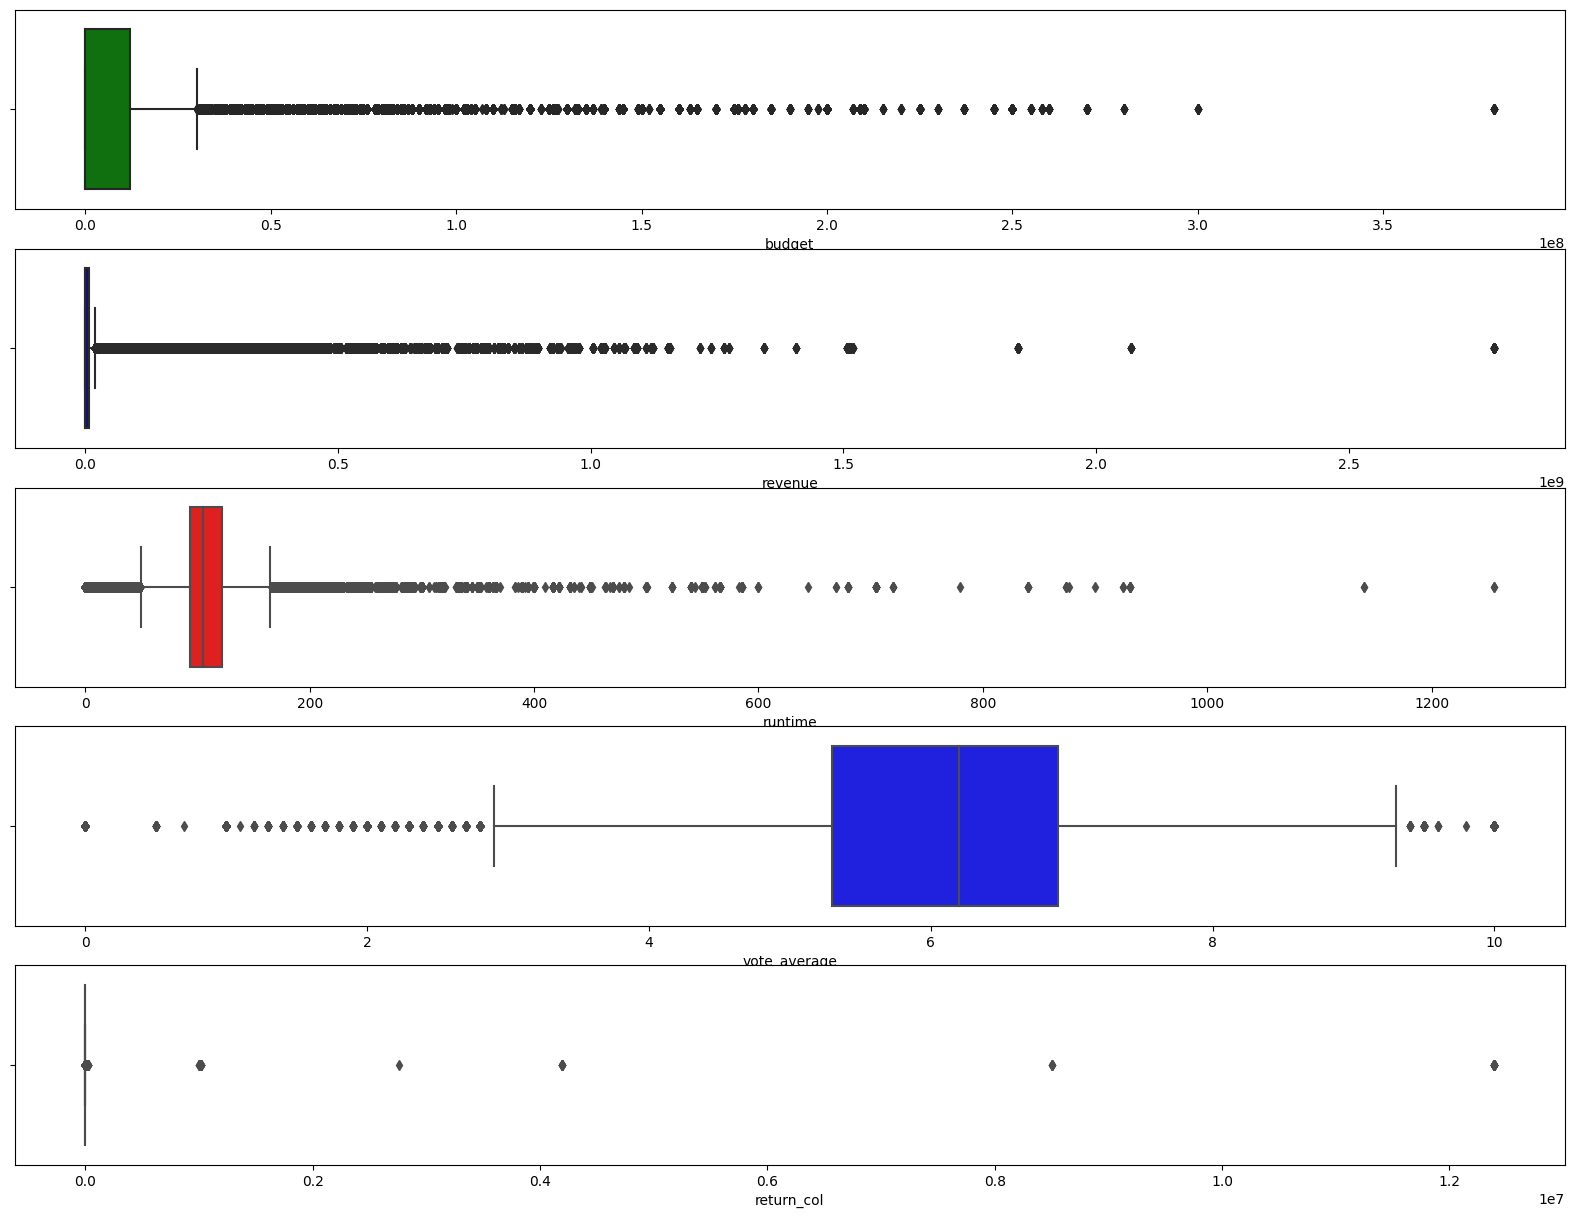

In [79]:
plt.figure(figsize= (20,15))
plt.subplot(5,1,1)
sns.boxplot(x= df.budget, color='green')

plt.subplot(5,1,2)
sns.boxplot(x= df.revenue, color='darkblue')

plt.subplot(5,1,3)
sns.boxplot(x= df.runtime, color='red')

plt.subplot(5,1,4)
sns.boxplot(x= df.vote_average, color='blue')

plt.subplot(5,1,5)
sns.boxplot(x= df.return_col, color='yellow')

plt.show()

In [81]:
# Resumen de las columnas no numericas 
df.describe(include=['O'])

,id,original_language,overview,popularity,status,tagline,title,collection,genre,company,country,language
count,419475,419379,416987,419475.000000,419332,227707,419475,53658,419475,419475,419475,419475
unique,45346,89,44232,44142.000000,6,20269,42196,1667,21,23346,159,75
top,8985,en,Twenty-five films from twenty-five European co...,0.958683,Released,France 1914. A moment of humanity that made hi...,Visions of Europe,Arn collection,Drama,,United States of America,English
freq,24700,287416,24700,24700.000000,417473,1120,24700,2004,109907,27215,128309,185667


ValueError: supplied range of [0.0, inf] is not finite

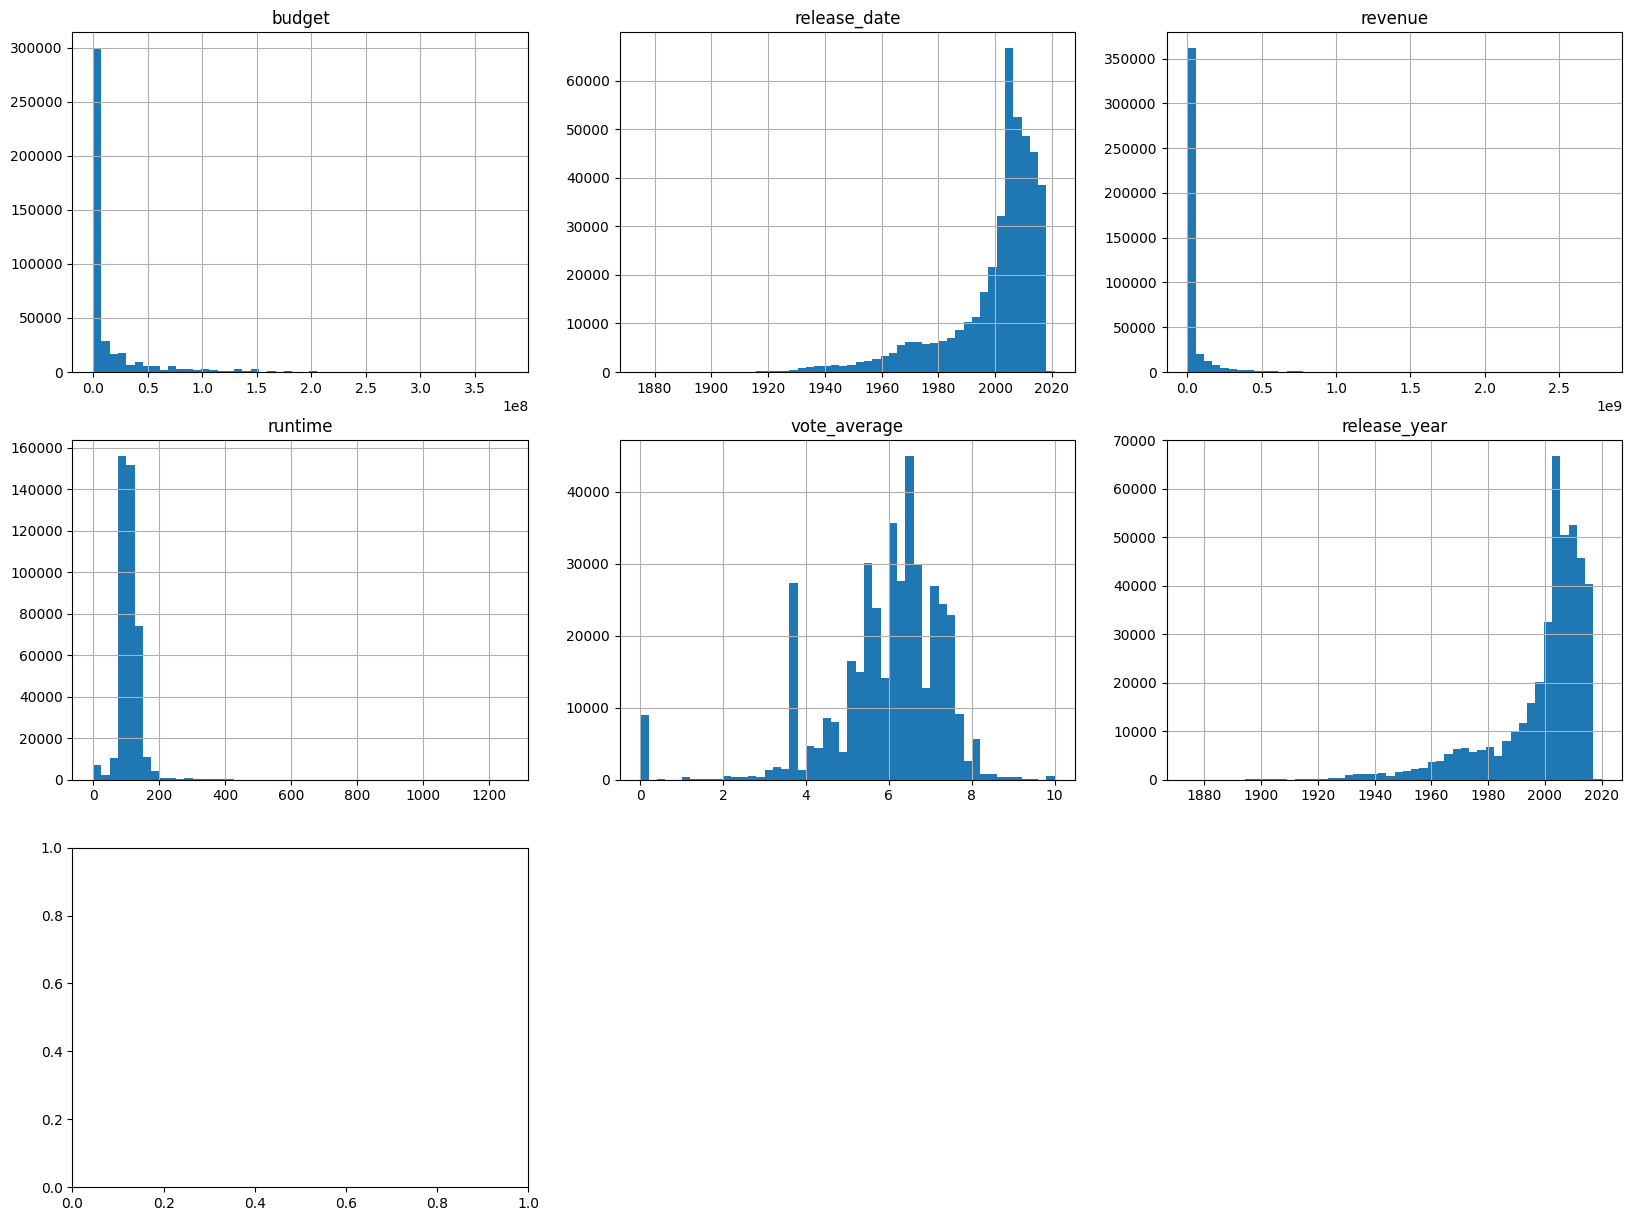

In [68]:
# Histograma de las columnas numéricas para entender la distribución
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\agusv\AppData\Local\Temp\ipykernel_16560\945593447.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


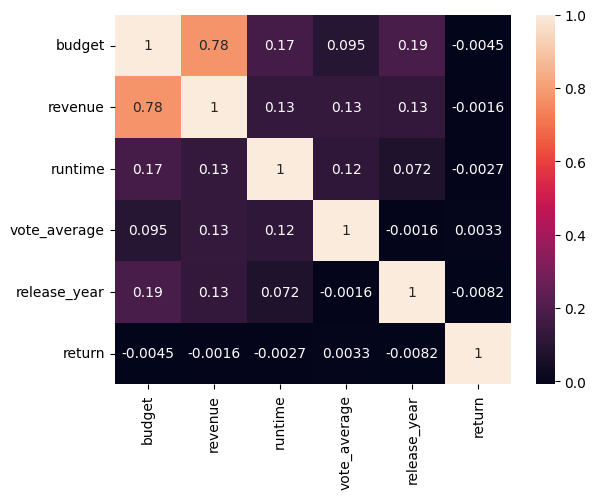

In [69]:
# Ver la correlación entre las columnas numéricas
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
# Para cada columna no numérica, veamos cuántos valores únicos tiene
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

id: 45346 valores únicos
original_language: 89 valores únicos
overview: 44232 valores únicos
popularity: 44142 valores únicos
status: 6 valores únicos
tagline: 20269 valores únicos
title: 42196 valores únicos
collection: 1667 valores únicos
genre: 21 valores únicos
company: 23346 valores únicos
country: 159 valores únicos
language: 75 valores únicos


In [71]:
# Puedes ver los valores únicos para algunas columnas si son pocos
print(df['status'].value_counts())

Released           417473
Rumored              1111
Post Production       547
In Production         120
Planned                80
Canceled                1
Name: status, dtype: int64


<Axes: xlabel='release_date'>

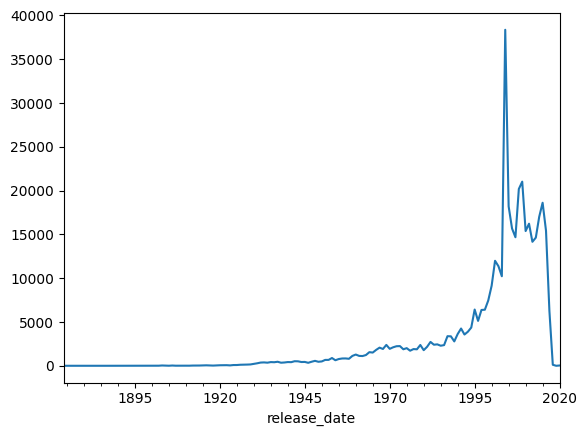

In [72]:
# Para la columna de fecha, podemos ver cómo se distribuyen las películas a lo largo del tiempo
df.set_index('release_date').resample('Y').size().plot()